Lab 9

- Dimensionality reduction with Latent Semantic Analysis
- Dictionary-based sentiment analysis
- Classification-based sentiment analysis

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

path = 'https://raw.githubusercontent.com/organisciak/Text-Mining-Course/master/data/contemporary_books/'
data = pd.read_csv(path + 'contemporary.csv', encoding='utf-8').set_index('book')
info = pd.read_csv(path + 'contemporary_labels.csv', encoding='utf-8')

# data.head()
# data.values

## Latent Semantic Analysis

Latent Semantic Analysis applies a dimensionality reduction, SVD, over the term-document matrix. It can be found in Sci-Kit Learn using a similar interface to what we saw for classification and clustering: you initialize the model, train it (`fit`), then optionally give it other texts to infer which topics they belong to (`transform`). As before, if you want to see the topics for the texts that you're training on, you can use `fit_transform` all at once.

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

In [3]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=2)
twodims = lsa.fit_transform(data.values)
# type(twodims)

`twodims` here gives us a representation of each of our books in two numbers. This is too small to be interpreted by us as topics, but the number are still useful for interpreting the similarity or difference of our books.

`twodims` is currently a Numpy Array, let's convert it to something we know better, a DataFrame:

In [4]:
twodims_df = pd.DataFrame(twodims, columns=['dim1', 'dim2'], index=info['title'])
twodims_df.head()

,dim1,dim2
title,,
The stand,4539.134777,-899.085756
Lady oracle;,1483.051270,-156.938065
The robber bride,2061.469682,1036.625792
The pelican brief,1304.004510,133.809138
The rainmaker,1642.424503,1212.007130


DataFrames have a call to `plot.scatter` that is useful here:

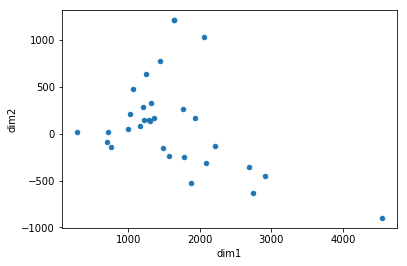

In [5]:
twodims_df.plot.scatter('dim1', 'dim2')

This plot of all the books shows that, when reducing the document-term matrix to 2-dimensions, *The Stand* is a heavy outlier, confirming what we saw last week.

As last week, a TFIDF transformation will give better results, as such:

![](../images/lsa_2dim_tfidf.png)

**Q1** (2pts): Show the code to produce the above image. Note that the TFIDF transformation uses sublinear TF scaling.

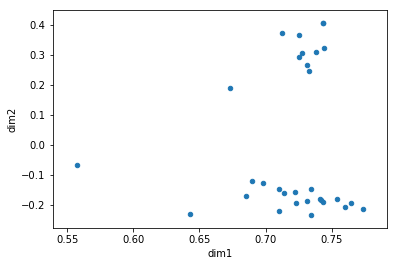

In [6]:
# Q1

%matplotlib inline
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer

path = 'https://raw.githubusercontent.com/organisciak/Text-Mining-Course/master/data/contemporary_books/'
data = pd.read_csv(path + 'contemporary.csv', encoding='utf-8').set_index('book')
info = pd.read_csv(path + 'contemporary_labels.csv', encoding='utf-8')

lsa = TruncatedSVD(n_components=2)
twodims = lsa.fit_transform(data.values)

# print(info)
# data.head()

transformer = TfidfTransformer(sublinear_tf=True)
twodims_tf_idf = transformer.fit_transform(data.values)

twodims_tf_idf_lsa = lsa.fit_transform(twodims_tf_idf)

twodims_tf_idf_df = pd.DataFrame(twodims_tf_idf_lsa, columns=['dim1','dim2'], index=info['title'])
# twodims_tf_idf_df.head(25)

twodims_tf_idf_df.plot.scatter('dim1', 'dim2')

## Inspecting the LSA output

You can look at how each word fits into each dimension with `lsa.components_`. This value only exists after the model is trained with `lsa.fit` or, as we did above, `lsa.fit_transform`.

*Tip*: If you're trying to figure out what information is in a matrix, often its useful to check how big it is. We know that our original document-term matrix is:

In [7]:
data.shape

(31, 17570)

.. 31 books x 17570 words. The output of our two-dimension LSA is:

In [8]:
twodims.shape

(31, 2)

...31 books x 2 dimensions. So when we check the size of `lsa.components_`:

In [9]:
lsa.components_.shape

(2, 17570)

We can infer that it is a dimension x word matrix. Convert it to a DataFrame and transpose it (i.e. rotate the columns/row, with `T`) so that the dimensions are rows rather than columns.

In [10]:
dimwords = pd.DataFrame(lsa.components_, columns=data.columns).T
dimwords.head()

,0,1
aback,0.003482,-0.003931
abagail,0.001587,-0.003958
abandon,0.004803,0.000010
abandoned,0.011372,0.004887
abandoning,0.003055,0.003171


What are the most representative words for a topic? Choose a column and sort it in descending order to find out. Noting that we didn't change the column names this time from the default `0` and `1`, selection and sorting should be familiar to you by now:

In [11]:
dimwords[0].sort_values(ascending=False).head()

said    0.037033
back    0.033661
time    0.032871
know    0.032695
get     0.032203
Name: 0, dtype: float64

Or more generally, extracting the top words from the index, for each dimension:

In [12]:
for i in range(0, 2):
    topwords = dimwords[i].sort_values(ascending=False)
    print(i, "Top words: ", topwords.index.values[:7])

0 Top words:  ['said' 'back' 'time' 'know' 'get' 'little' 'see']
1 Top words:  ['lawsuit' 'courtroom' 'jury' 'litigation' 'jurors' 'fees' 'client']


To move toward topics, try training with more dimensions, and with smaller document frames (e.g. pages rather than books). Here are the top words for 15 topics:

```
0 Top words:  ['time' 'way' 'something' 'eyes' 'man' 'door' 'head']
1 Top words:  ['lawyers' 'trial' 'lawyer' 'jury' 'client' 'firm' 'office']
2 Top words:  ['university' 'mar' 'billing' 'books' 'book' 'date' 'fiction']
3 Top words:  ['fiction' 'copyright' 'book' 'women' 'author' 'children' 'permission']
4 Top words:  ['copyright' 'book' 'fiction' 'trademarks' 'characters' 'resemblance'
 'author']
5 Top words:  ['jury' 'jurors' 'courtroom' 'witness' 'trial' 'courthouse' 'county']
6 Top words:  ['copyright' 'division' 'trademarks' 'persons' 'rights' 'resemblance'
 'permission']
7 Top words:  ['claims' 'claim' 'policy' 'documents' 'company' 'firm' 'marrow']
8 Top words:  ['woods' 'boat' 'settlement' 'firm' 'water' 'tree' 'trees']
9 Top words:  ['quarterback' 'team' 'panthers' 'football' 'field' 'game' 'ball']
10 Top words:  ['beach' 'shells' 'daughter' 'paintings' 'pictures' 'painting' 'ship']
11 Top words:  ['firm' 'tort' 'plaintiffs' 'art' 'trial' 'paintings' 'shells']
12 Top words:  ['maids' 'suitors' 'cop' 'palace' 'husband' 'son' 'father']
13 Top words:  ['boat' 'river' 'cop' 'sand' 'plane' 'wind' 'boats']
14 Top words:  ['firm' 'exam' 'hospital' 'horror' 'bar' 'nurse' 'cell']
```

We've posted data for 10-page chunks of the same books here:

In [13]:
path = 'https://raw.githubusercontent.com/organisciak/Text-Mining-Course/master/data/contemporary_books/'
data = pd.read_csv(path + 'contemporary-pages.csv.gz', encoding='utf-8', compression='gzip').set_index('id')
info = pd.read_csv(path + 'contemporary-pages_labels.csv', encoding='utf-8')

# info.head(125)

**Q2**: Training on the page chunks, train a model with 15 topics and view the topics. They'll be similar but not necessarily the same to what is posted above. Share your code.

In [14]:
# Q2

from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=15)
fifteendims = lsa.fit_transform(data.values)

fifteendims_df = pd.DataFrame(fifteendims, columns=['dim1', 'dim2', 'dim3','dim4','dim5','dim6','dim7','dim8','dim9','dim10','dim11', 'dim12', 'dim13','dim14','dim15'], index=info['title'])
fifteendims_df.head(20)

fifteendimwords = pd.DataFrame(lsa.components_, columns=data.columns).T
# fifteendimwords.shape

# fifteendimwords[0].sort_values(ascending=False).head()

for i in range(0, 15):
    topwords = fifteendimwords[i].sort_values(ascending=False)
    print(i, "Top words: ", topwords.index.values[:8])

0 Top words:  ['time' 'way' 'man' 'something' 'eyes' 'people' 'head' 'door']
1 Top words:  ['money' 'lawyers' 'lawyer' 'office' 'jury' 'trial' 'years' 'case']
2 Top words:  ['mother' 'film' 'horror' 'father' 'book' 'story' 'things' 'house']
3 Top words:  ['film' 'horror' 'book' 'man' 'story' 'tv' 'novel' 'people']
4 Top words:  ['jury' 'jurors' 'trial' 'courtroom' 'witness' 'claims' 'case' 'time']
5 Top words:  ['man' 'mother' 'father' 'people' 'woman' 'jury' 'money' 'cop']
6 Top words:  ['film' 'mother' 'door' 'cop' 'car' 'father' 'book' 'tv']
7 Top words:  ['room' 'door' 'man' 'women' 'bed' 'woman' 'floor' 'men']
8 Top words:  ['film' 'money' 'eyes' 'hand' 'room' 'lawyers' 'water' 'lawyer']
9 Top words:  ['cop' 'something' 'people' 'women' 'phone' 'things' 'woman' 'anything']
10 Top words:  ['money' 'time' 'car' 'claims' 'father' 'cop' 'house' 'room']
11 Top words:  ['film' 'phone' 'time' 'mother' 'book' 'night' 'tv' 'man']
12 Top words:  ['film' 'cop' 'women' 'car' 'water' 'men' 'bo

## Sentiment Analysis - Dictionary Method

One form of sentiment analysis is through dictionaries that assign a valence to a set of known words.

We'll use a version of the dictionary created by Nielson (2011). To use it, download the [zip file](http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010) and unpack `AFINN-111.txt`.

\*Nielsen, Finn Årup. May 2011. "A new ANEW: Evaluation of a word list for sentiment analysis in microblogs", Proceedings of the ESWC 2011 Workshop on 'Making Sense of Microposts': Big things come in small packages 718 in CEUR Workshop Proceedings : 93-98. http://arxiv.org/abs/1103.2903

This dictionary assigns emotional values from -5 to +5: negative values denote negative emotion, while positive values are positive.

In [15]:
# afinn = pd.read_csv("../data/AFINN-111.txt", sep='\t', names=['token','valence'])
afinn = pd.read_csv("/Users/rdubnic2/Documents/lis590txl/Data/AFINN-111.txt", sep='\t', names=['token','valence'])
afinn.sample(5)

,token,valence
2215,terribly,-3
1157,haters,-3
1277,inconsiderate,-2
1438,liked,2
1774,profiteer,-2


Here's an example of a word at each sentiment value:

(What am I doing here? I'm grouping by different values for 'value' and randomly sampling a single row from that subgroup)

In [16]:
afinn.groupby('valence').apply(lambda x: x.sample())

,,token,valence
valence,,,
-5,420,cocksuckers,-5
-4,2466,wtf,-4
-3,2438,woeful,-3
-2,308,boycott,-2
-1,673,disappear,-1
0,2073,some kind,0
1,865,entitled,1
2,2187,supports,2
3,1470,love,3


One way to use a sentiment dictionary is to assign sentiment weights to all the known words, and sum it up.

Since we already have the sentiment dictionary as a Pandas DataFrame, we can load a DataFrame from our text and do an 'inner join', which joins two dataframes based on the values that overlap between specific columns.

The book we'll try is _The Stand_, available in the Github repository or at https://bedrock.resnet.cms.waikato.ac.nz/vol-checker/VolumeCheck?download-id=mdp.39015005028686. 

In [17]:
# Load a volume
from htrc_features import FeatureReader
fr = FeatureReader('../data/contemporary_books/dataset_files/mdp.39015005028686.json.bz2')
vol = fr.first()

print("Our book is ", vol.title)

df = vol.tokenlist(pos=False, pages=False, case=False).reset_index()
# df.head()

Our book is  The stand / Stephen King.


Inner join is possible with `pd.merge(dataframe1, dataframe2)`.

Here is a visual example of inner joining from the [Brief primer on merge methods](http://pandas.pydata.org/pandas-docs/stable/merging.html#brief-primer-on-merge-methods-relational-algebra) from the Pandas documentation:

![](../images/inner-join.png)

In [23]:
valence = pd.merge(df, afinn, left_on='lowercase', right_on='token')
valence.head()

,section,lowercase,count,token,valence
0,body,abandon,2,abandon,-2
1,body,abandoned,6,abandoned,-2
2,body,ability,8,ability,2
3,body,aboard,2,aboard,1
4,body,absolve,1,absolve,2


As you can see, the only the words from _The Stand_ that also exist in the dictionary were retained.

Side-note: there are two columns that you don't need. If they bother you they can be deleted with `drop()` -- e.g., `valence.drop(['section', 'lowercase'], 1)` -- or simply ignore them!

**Q3** (2 points): Share the code to determine the sum of all the sentiment scores for _The Stand_. Hints: The result is `-1397`, not `-559`. Also, remember that a single column of a DataFrame is simply as Series object, so Googling 'sum a Series in Pandas' might help in summing a column.

In [19]:
# Q3

total_valence_vals = valence['count'] * valence['valence']
valence['total valence'] = total_valence_vals

valence['total valence'].sum()

-1397

**Q4**: What is a possible problem with summing a set of dictionary assigned sentiment scores?

## Q4 Answer

Aside from the problem with doing the above, where you aren't actually getting a cumulative valence score, though you might expect it, you lose a lot of nuance in the scores. For instance, the -2 and 2 valence numbers basically cancel out, leaving the extreme values to dictate the overal valence number for the whole collection. Sometimes this might be ok, if your valence score is very high or low, but mostly it fuzzes your data, I think.

**Q5** (2 points): Share the code for determining the page-by-page sentiment in the book. You'll need to load more data out of the volume, and return to your groupby() skills.

Hint: The sentiments for pages 8,9,and 13 are +5, +11, and -10. If you run .plot() on your final dataframe, it will look like this:

![](../images/thestand-valence.png)

Our book is  The stand / Stephen King.


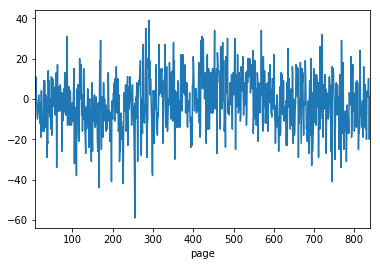

In [20]:
# Q5

# Load a volume
from htrc_features import FeatureReader
fr = FeatureReader('../data/contemporary_books/dataset_files/mdp.39015005028686.json.bz2')
vol = fr.first()

print("Our book is ", vol.title)

afinn = pd.read_csv("/Users/rdubnic2/Documents/lis590txl/Data/AFINN-111.txt", sep='\t', names=['token','valence'])
# afinn.sample(5)

stand_df = vol.tokenlist(pos=False, pages=True, case=False).reset_index()
# stand_df.head()

stand_valence = pd.merge(stand_df, afinn, left_on='lowercase', right_on='token').groupby('page')
stand_valence_vals = stand_valence.apply(lambda x: (x['count']* x['valence']).sum())
# stand_valence_vals.head()
stand_valence_vals.plot()


In [21]:
afinn.head()

,token,valence
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


## Tip

That page-by-page sentiment plot is messy. If you want to see the overarching thrust of sentiment in the novel, try smoothing it with a rolling mean.

A rolling mean takes the average sentiment for a window of pages, then moves the window forward one spot and averages again, and so on (e.g. with a window of 5, means are taken for pages 1-5, then pages 2-6, then 3-7, etc.).

In [22]:
stand_valence_vals['rolling'] = stand_valence_vals['total'].rolling(window=60, min_periods=1).mean()
stand_valence_vals['rolling'].plot()

KeyError: 'total'

This generally aligns with events in the *The Stand*. Things are fine for a very brief moment because a virus wipes out most of America. The rising sentiment happens through the middle act, as survivors are finding eaching, travelling toward Boulder, CO, and eventually rebuilding. Then the third act has a showdown with an antogonist and some smaller survival conflicts.

Not perfect, but certainly more representative then the unsmoothed version!

## Extra Notes

Here is how you can visualize `twodims` in its original Numpy Array form, without converting it to a DataFrame.

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=twodims[:,0], y=twodims[:,1])

Since we have not done much work with arrays, it is worth noting how we provided the values to the scatterplot.

The twodims array provides two values for each books. By asking for `twodims[:,0]` to set to x, that simply returns the first value for all the books. `:` is essentially saying "from start to finish": in this case we asked for all the rows. The second value refers to the columns: we only asked for the first column: `0`.

Consider an array called `arr` that looks like this:

```
[[a, A],
 [b, B],
 [c, C]]
```

In this example, `arr[:,0]` returns `[a,b,c]`, while `arr[:,1]` returns `[A,B,C]`.

Of course, while we haven't dealt with arrays much, we have dealt with their smarter cousin, DataFrames. If you want ignore all of the above, you can also convert twodims to a more familiar DataFrame: